In [ ]:
library ("dplyr")
library ("readr")
install.packages("outliers")
library ("outliers")
library ("ggplot2")
install.packages("EnvStats")
library("EnvStats")
install.packages("lmtest")
library("lmtest")
install.packages("car")
library("car")
install.packages("mctest")
library("mctest")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’



Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘Sparse

In [ ]:
# Import Dataset that being used
# Source : https://www.kaggle.com/datasets/faisaljanjua0555/daily-gold-price-historical-dataset
gold <- read_csv("gold.csv")
head(gold)

Rows: 5703 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Currency
dbl  (5): Open, High, Low, Close, Volume
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,Open,High,Low,Close,Volume,Currency
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2000-01-04,289.5,289.5,280.0,283.7,21621,USD
2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2000-01-06,281.6,282.8,280.2,282.4,19055,USD
2000-01-07,282.5,284.5,282.0,282.9,11266,USD
2000-01-10,282.4,283.9,281.8,282.7,30603,USD
2000-01-11,282.4,285.3,281.9,284.4,13500,USD


# 1. Uji Asumsi (Statistical Assumption)


In [ ]:
goldmodel <- lm(Open ~ High + Low + Close + Volume, data=gold)
summary(goldmodel)


Call:
lm(formula = Open ~ High + Low + Close + Volume, data = gold)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.620  -2.134   0.188   2.251  47.351 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.120e-01  1.606e-01  -2.565  0.01033 *  
High         9.318e-01  8.661e-03 107.592  < 2e-16 ***
Low          7.938e-01  9.695e-03  81.876  < 2e-16 ***
Close       -7.256e-01  1.199e-02 -60.509  < 2e-16 ***
Volume      -2.711e-06  1.023e-06  -2.651  0.00804 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.406 on 5698 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.312e+07 on 4 and 5698 DF,  p-value: < 2.2e-16


## 1.1 Normality Test

The first assumption test used is the normality test, where this test is used to see whether there is a normal residual value or not. Since a good regression model is a model with normal distribution. It is also not necessary to use the normality test for every existing variable, but only for residual values, thereby saving testing time for the selected variables. This test starts with null hypothesis or H0, data with normal distribution. This hypothesis proved by knowing the significant value / the p-value of the data. When the significant drops under 0.05, it rejects the H0 and accepts the vice versa, H1, the alternative hypothesis, where the data is not normally distributed. There are three types of normality test, such as Jarque-Bera (BR), Saphiro-Wilk (SW), and Anderson-Darling (AD). In this paper, the focus is on the AD. The AD tests are based on the empirical distribution function (EDF), also on the squared difference between normal and empirical. This test in R code allows to show the p-value needed to conclude the hypothesis.

In [ ]:
install.packages("nortest")
library("nortest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Uji Normalitas : Anderson-Darling (AD) Test
ad.test(goldmodel$residuals)


	Anderson-Darling normality test

data:  goldmodel$residuals
A = 130.3, p-value < 2.2e-16


Hypothesis 𝐇ₒ = data is normally distributed

The test shows that p-value drops far below 0.05, which rejects H0 and accepts H1. This concludes that the alternative hypothesis is chosen, where the data is not normally distributed. This is a caution that  the data might have outliers that disrupted the normality.

## 1.2 Autocorrelation Test

The autocorrelation test is a test conducted to see whether there is a correlation between a period and previous periods. In other words, the autocorrelation test is an analysis of the regression which consists of testing whether there is an influence of the independent variable on the dependent variable, so there should be no correlation between the observations and the previous observational data. There are 3 type of autocorrelation, consisting of negative, positive, and no autocorrelation. The value of autocorrelation varies from -1 for perfectly negative, 1 for perfectly autocorrelation, and 0 for no autocorrelation. Value below -1 considered weak autocorrelation and above 1 considered strong autocorrelation. In R code, Durbin-Watson Test (DW)  is usable for this test. Null hypothesis of H0 referred as data has no autocorrelation while the alternative hypothesis H1 has. The significant value above 0.05 casts doubt on the validity of the null hypothesis and indicates autocorrelation among residuals

In [ ]:
#Uji Autokorelasi : Durbin-Watson (DW) Test
dwtest(goldmodel)


	Durbin-Watson test

data:  goldmodel
DW = 1.9912, p-value = 0.3585
alternative hypothesis: true autocorrelation is greater than 0


Hypothesis 𝐇ₒ = data is not autocorrelated.

The result shows that the p-value lies above 0.05, which is 0.3585, this leads the hypothesis 𝐇ₒ is rejected and Hypothesis H1 is accepted, where the data has autocorrelation.  To be specific, can be concluded from the results of the DW value (Durbin-Watson). The closer to 2, the higher the degree of autocorrelation (high autocorrelation). Vice versa, the closer to 0, the higher the autocorrelation. In this test, the DW result was 1.9912. So, it can be concluded that this test rejects the 𝐇ₒ Hypothesis, that is, the data is highly autocorrelated

## 1.3 Homogeneity Test

Homogeneity test is a test conducted to determine whether the variances of two or more distributions are the same. Homogeneity test can be done by Levene, Fisher, Bartlett or Breush-Pagan test. The homogeneity test is carried out with the aim of showing two or more groups of sample data that have been taken from populations that have the same variance. In other words, the homogeneity test is carried out to determine whether the data set under study has the same characteristics or not. In R code, Breush-Pagan test will be used to prove the homogeneity test. The result of Breush-Pagan test for the significant value if under 0.05, the data is heterogenuous, otherwise it is homogenuous.

In [ ]:
#Uji Homogenitas : Breush-Pagan (BP) Test
bptest(goldmodel, studentize=FALSE, data=gold)


	Breusch-Pagan test

data:  goldmodel
BP = 10344, df = 4, p-value < 2.2e-16


Hipotesis 𝐇ₒ = data is homogenuous (variance of the variables are equal)

The Breusch-Pagan test shows that p-value drops far below 0.05, which rejects H0 and accepts H1. Like the normality test, this concludes that the alternative hypothesis is chosen, where the data is not homogenuous. In other words, the data is heterogenuous (variance of the variables are different).

## 1.4 Multicollinearity Test

The multicollinearity test is used to determine whether there is a high correlation between the independent variables and the multiple linear regression model. If there is a high correlation between the independent variables, then the relationship with the independent variables and the dependent variable is disrupted.

Multicollinearity testing using the Variance Inflation Factor (VIF) is a test to find out how high the collinearity is between the variables. The results of the VIF show:
- VIF is equal to 1 = variables are not correlated with each other.
- VIF between 1 to 5 = quite correlated between the variables.
- VIF > 5 = highly correlated variables.
- VIF > 10 = has a multicollinearity problem that needs to be corrected.


In [ ]:
#Uji Multikolinearitas : Variance Inflation Factor (VIF)
vif(goldmodel)

High         Low       Close      Volume 
3993.450677 4854.294535 7543.453010    2.144939

Based on the test results, it was found that the High, Low, Close variables had VIF > 10, so it can be concluded that there is a multicollinearity problem. As for the volume variable, it has a VIF value of 2, so this variable is quite correlated.

# 2. Outlier Test

## 2.1 The Generalized ESD Test

The generalized (extreme Studentized deviate) ESD test was used to detect one or more outliers in a univariate data set that follows a normal distribution. The main limitation of the Grubbs test and the Tietjen-Moore test is that the number of suspected outliers, k, must be determined with precision. If k is not determined correctly, it can distort the conclusions of this test. On the other hand, common ESD tests (require only that an upper bound for the number of suspected outliers be determined. This test essentially performs r separate tests: a test for one outlier, a test for two outliers, and so on up to r outliers.

### 2.1.1 Open

In [ ]:
gold <- select(gold, -Currency)
vector_open <- pull(gold, Open)
rosner <- rosnerTest(vector_open, k=5)$all.stats
rosner

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1040.383,518.7334,2076.4,5181,1.997206,4.441880,FALSE
1,1040.201,518.5974,2060.2,5580,1.966842,4.441842,FALSE
2,1040.022,518.4668,2055.0,5180,1.957652,4.441804,FALSE
3,1039.844,518.3379,2044.8,5182,1.938804,4.441765,FALSE
4,1039.668,518.2124,2038.4,5183,1.927264,4.441727,FALSE


The result shows that ‘Open’ doesn’t have outliers among the data in that column. This can be seen by the outlier value stated as false. The 'false' means that it doesn't exist such outliers.

### 2.1.2 Low


In [ ]:
vector_open <- pull(gold, Low)
rosnerTest(vector_open)$all.stats

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1031.863,514.4559,2049.0,5180,1.977112,4.441880,FALSE
1,1031.685,514.3246,2027.8,5182,1.936744,4.441842,FALSE
2,1031.510,514.2004,2027.5,5179,1.936968,4.441804,FALSE


The same as the variable 'Open', the result shows that 'Low' doesn’t have outliers among the data in that column.

### 2.1.3 High

In [ ]:
vector_open <- pull(gold, High)
rosnerTest(vector_open)$all.stats

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1048.339,522.3539,2089.2,5181,1.992635,4.441880,FALSE
1,1048.157,522.2178,2081.8,5180,1.979334,4.441842,FALSE
2,1047.975,522.0841,2078.8,5579,1.974442,4.441804,FALSE


The same as the variable 'Open', the result shows that 'High' doesn’t have outliers among the data in that column.

### 2.1.4 Close

In [ ]:
vector_open <- pull(gold, Close)
rosnerTest(vector_open)$all.stats

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,1040.298,518.5240,2069.4,5180,1.984675,4.441880,FALSE
1,1040.118,518.3903,2049.3,5179,1.946761,4.441842,FALSE
2,1039.941,518.2634,2043.3,5579,1.936002,4.441804,FALSE


The same as the variable 'Open', the result shows that 'Close' doesn’t have outliers among the data in that column.

### 2.1.5 Volume

In [ ]:
vector_open <- pull(gold, Volume)
rosnerTest(vector_open)$all.stats

i,Mean.i,SD.i,Value,Obs.Num,R.i+1,lambda.i+1,Outlier
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
0,139141.7,102537.4,816531,4240,6.606263,4.441880,TRUE
1,139022.9,102153.2,813406,5034,6.601685,4.441842,TRUE
2,138904.6,101770.8,745843,5069,5.963776,4.441804,TRUE


For variable 'Volume', it does have outliers. But, using this method for the Generalized ESD Test, it doesn't show how many outliers does it have in the data. Hence, going to use another way for this method.

In [ ]:
out_Close <- rosnerTest(gold$Volume, k = 20)
out_Close

Warning message in rosnerTest(gold$Volume, k = 20):
“The true Type I error may be larger than assumed.
Although the help file for 'rosnerTest' has a table with information
on the estimated Type I error level,
simulations were not run for k > 10 or k > floor(n/2).”


$distribution
[1] "Normal"

$statistic
     R.1      R.2      R.3      R.4      R.5      R.6      R.7      R.8 
6.606263 6.601685 5.963776 5.534563 5.357086 5.313242 5.304842 5.187747 
     R.9     R.10     R.11     R.12     R.13     R.14     R.15     R.16 
5.119931 5.052644 4.795425 4.701740 4.704504 4.592149 4.539937 4.445596 
    R.17     R.18     R.19     R.20 
4.421980 4.420335 4.354039 4.351769 

$sample.size
[1] 5703

$parameters
 k 
20 

$alpha
[1] 0.05

$crit.value
 lambda.1  lambda.2  lambda.3  lambda.4  lambda.5  lambda.6  lambda.7  lambda.8 
 4.441880  4.441842  4.441804  4.441765  4.441727  4.441689  4.441651  4.441612 
 lambda.9 lambda.10 lambda.11 lambda.12 lambda.13 lambda.14 lambda.15 lambda.16 
 4.441574  4.441536  4.441497  4.441459  4.441421  4.441383  4.441344  4.441306 
lambda.17 lambda.18 lambda.19 lambda.20 
 4.441267  4.441229  4.441191  4.441152 

$n.outliers
[1] 16

$alternative
[1] "Up to 20 observations are not\n                                 from the sam

The result shows that ‘Volume’ have 16 outliers. These outliers could be the cause that some statictical assumption is questionable.

# 3. Regression Model

## 3.1 Linear Model Regression

In [ ]:
lmModel <- lm(Open ~ Volume, data = gold)
summary(lmModel)


Call:
lm(formula = Open ~ Volume, data = gold)

Residuals:
     Min       1Q   Median       3Q      Max 
-2135.41  -307.13   -75.18   259.21  1218.28 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.532e+02  8.358e+00   66.18   <2e-16 ***
Volume      3.501e-03  4.836e-05   72.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 374.4 on 5701 degrees of freedom
Multiple R-squared:  0.479,	Adjusted R-squared:  0.4789 
F-statistic:  5242 on 1 and 5701 DF,  p-value: < 2.2e-16


In [ ]:
anova_lmModel <- anova(lmModel)
anova_lmModel

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Volume,1,734990547,734990546.7,5242.128,0
Residuals,5701,799328224,140208.4,NA,NA


In [ ]:
sqrt(anova_lmModel$`Mean Sq`)

[1] 27110.7091   374.4442

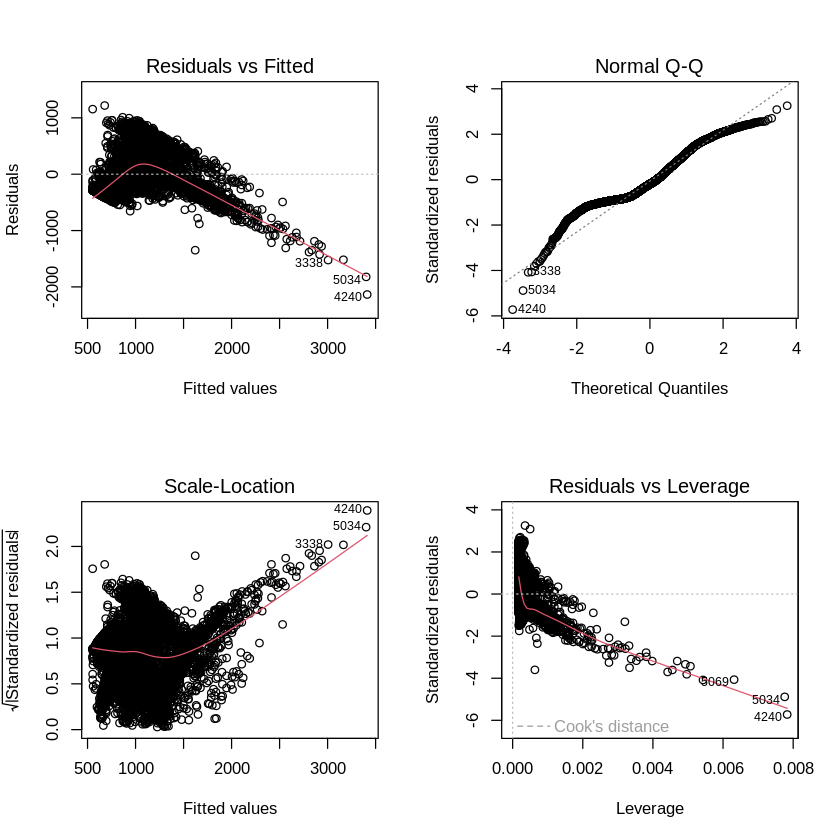

In [ ]:
par(mfrow=c(2,2))
plot(lmModel)
par(mfrow=c(1,1))

## 3.2 Logistic Regression (Gaussian)

In [ ]:
logistic_Model = glm(Open~Volume, data = gold, family = gaussian)
summary(logistic_Model)


Call:
glm(formula = Open ~ Volume, family = gaussian, data = gold)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2135.41   -307.13    -75.18    259.21   1218.28  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.532e+02  8.358e+00   66.18   <2e-16 ***
Volume      3.501e-03  4.836e-05   72.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 140208.4)

    Null deviance: 1534318771  on 5702  degrees of freedom
Residual deviance:  799328224  on 5701  degrees of freedom
AIC: 83774

Number of Fisher Scoring iterations: 2


In [ ]:
anova(logistic_Model)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,5702,1534318771
Volume,1,734990547,5701,799328224


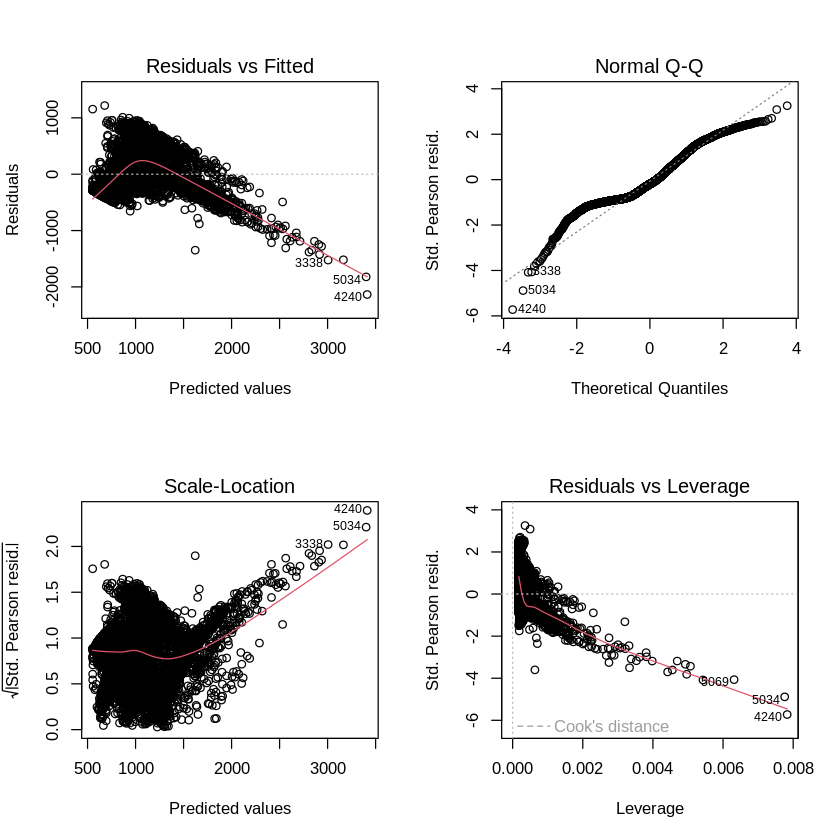

In [ ]:
par(mfrow=c(2,2))
plot(logistic_Model)
par(mfrow=c(1,1))

## 3.3 Lasso Regression

In [ ]:
install.packages("glmnet")
library("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


Loading required package: Matrix

Loaded glmnet 4.1-6



In [ ]:
#Define Open as predictor and other numeric variables as response variables
y <- gold$Open
x <- data.matrix(gold[, c('Low', 'High', 'Close', 'Volume')])

In [ ]:
#fit lasso regression model using k-fold cross-validation
cv_model <- cv.glmnet(x, y, alpha = 1)
best_lambda <- cv_model$lambda.min
best_lambda

[1] 12.55139

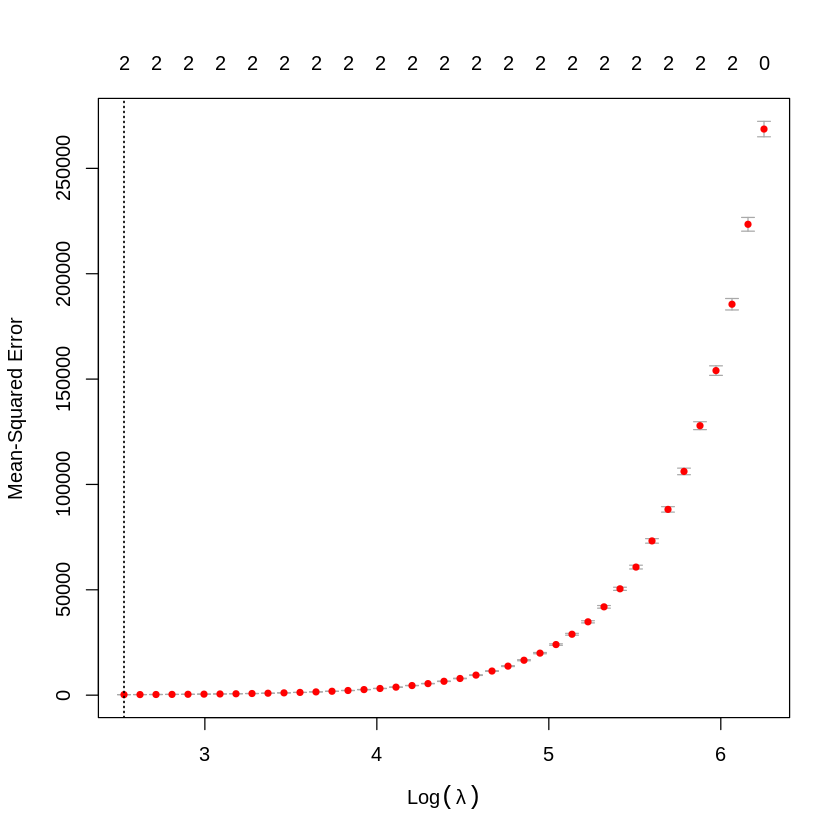

In [ ]:
plot(cv_model)

In [ ]:
#view coefficients of best model
best_model <- glmnet(x, y, alpha = 1, lambda = best_lambda)
coef(best_model)

5 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept) 2.501713e+01
Low         9.831928e-01
High        8.062412e-04
Close       .           
Volume      .           

In [ ]:
#make a prediction for the response value of a new observation
new = matrix(c(24, 2.5, 3.5, 18.5), nrow=1, ncol=4)
predict(best_model, s = best_lambda, newx = new)

s1
48.61578


In [ ]:
#find R-squared of model on training data
y_predicted <- predict(best_model, s = best_lambda, newx = x)

#find SST and SSE
sst <- sum((y - mean(y))^2)
sse <- sum((y_predicted - y)^2)

#find R-squared
rsq <- 1 - sse/sst
rsq

[1] 0.999078

The R-squared turns out to be 0.99907798. That is, the best model was able to explain 99.91% of the variation in the response values of the training data.

## 3.4 Ridge Regression

In [ ]:
#fit ridge regression model
ridge_model <- glmnet(x, y, alpha = 0)
summary(ridge_model)

          Length Class     Mode   
a0        100    -none-    numeric
beta      400    dgCMatrix S4     
df        100    -none-    numeric
dim         2    -none-    numeric
lambda    100    -none-    numeric
dev.ratio 100    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        4    -none-    call   
nobs        1    -none-    numeric

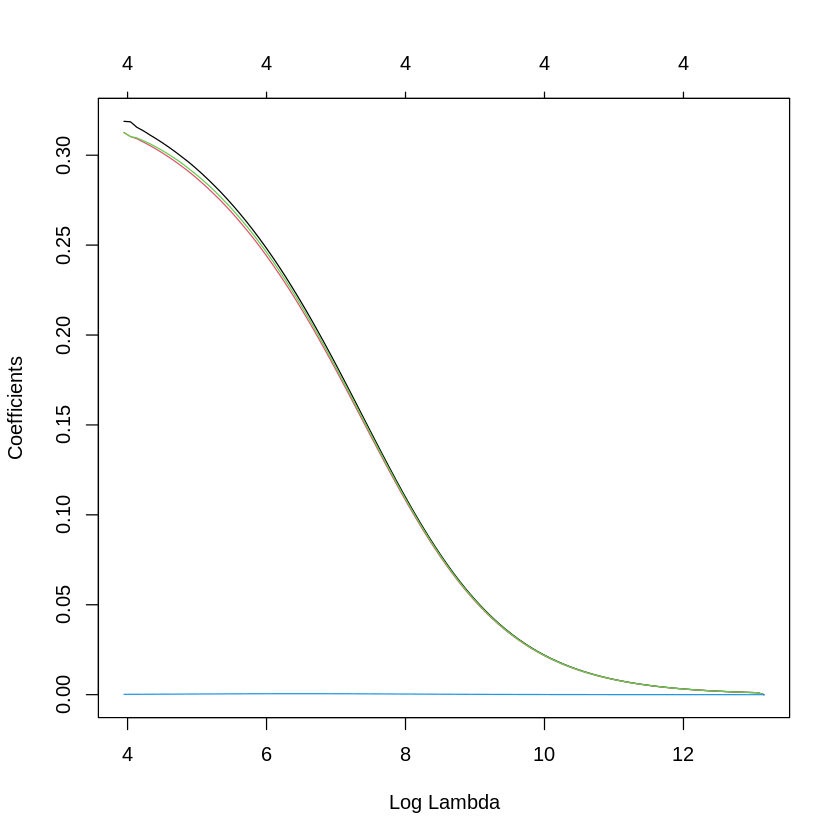

In [ ]:
#produce Ridge trace plot
plot(ridge_model, xvar = "lambda")

In [ ]:
#find coefficients of best model
best_model <- glmnet(x, y, alpha = 0, lambda = best_lambda)
coef(best_model)

5 x 1 sparse Matrix of class "dgCMatrix"
                      s0
(Intercept) 8.163383e+00
Low         3.260497e-01
High        3.335598e-01
Close       3.246357e-01
Volume      6.021972e-05

In [ ]:
#calculate R-squared of model on training data
y_predicted <- predict(ridge_model, s = best_lambda, newx = x)

#find SST and SSE
sst <- sum((y - mean(y))^2)
sse <- sum((y_predicted - y)^2)

#find R-Squared
rsq <- 1 - sse / sst
rsq

[1] 0.9981367

The R-squared turns out to be 0.99813667. That is, the best model was able to explain 99.84% of the variation in the response values of the training data.

# 4. Measurement

## 4.1 R-squared

R Square measures how much variability in dependent variable can be explained by the model. It is the square of the Correlation Coefficient(R) and that is why it is called R Square.

In [ ]:
summary(goldmodel)$r.squared

[1] 0.9998915

The result shows that the numerical variables in the gold dataset has R-square of 0.99989. It means that all movements of a/other dependent variable) are completely explained by movements in the index (or independent variable). The 99.99 % fitness of the gold dataset means that the price of performance moves relatively in line thorough the time.

## 4.2 Mean Square Error(MSE)

Mean Square Error is an absolute measure of the goodness for the fit. MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number.

In [ ]:
gold_summarize <- summary(goldmodel)
mean(gold_summarize$residuals^2)

[1] 29.19755

Techinally, an ideal Mean Squared Error (MSE) value is 0.0, which means that all predicted values matched the expected values exactly. In this part, the MSE value is 29.2, which is high. From the outlier test, the volume cause this high value since MSE is  most useful when the dataset contains outliers , where the 'volume' consists of  16 outliers.

## 4.3 Root Mean Square Error (RMSE)

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [ ]:
sqrt(mean(gold_summarize$residuals^2))

[1] 5.403475

The result of RMSE, which is 5.403 , explains that the squared root of squared differences between the predictions and observed values is around 5. This is considered a little bit high since 0 is the perfect score for RMSE. Again, this result is the cause of 'Volume' that have 16 outliers.

## 4.4 Mean Absolute Error(MAE)

Mean absolute error (MAE) characterizes the alteration among the original and predictable values ​​and is mined as the dataset's total deviation mean. MAE is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

In [ ]:
install.packages("Metrics")
library("Metrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
mae(gold$Open, predict(goldmodel))

[1] 3.500681

The result of MAE shows that there is 3.5 % difference from the true value.

# 5. Analysis and Discussion


## 5.1 Analysis

### 5.1.1 Linear Regression Model

Linear regression models describe the relationship between the dependent variable, y, and one or more independent variables, X. The dependent variable is also called the response variable. Independent variables are also called explanatory or predictor variables. Continuous predictor variables are also called covariates, and categorical predictor variables are also called factors. The X matrix of observations on the predictor variable is usually called the design matrix.

### 5.1.2 Logistic Regression

This type of statistical model (also known as a logit model) is often used for classification and predictive analytics. Logistic regression estimates the likelihood of an event occurring, such as voting or not voting, based on a given independent variable dataset. Since the result is a probability, the dependent variable is bounded between 0 and 1.

### 5.1.3 Lasso Regression

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression. In lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients

### 5.1.4 Ridge Regression

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

## 5.2 Discussion

### 5.2.1 Linear vs Logistic Regression

To find out which regression method is better, we can compare the R square, where the closer to number 1, the better. The plot results from the two methods above have the same picture, so the R square is the same, it is 0.479. So, there is nothing better between Linear Regression and Logistic Regression.

### 5.2.2 Lasso vs Ridge Regression

From the results of the lasso regression and the ridge regression, we can see that the lasso regression has a higher r-squared result than the ridge regression. This means that the lasso regression models are better than the ridge regression models when used on the gold dataset, considering the fact that the lasso regression can explain more of the variation in the dependent variable.

Lasso r-squared > Ridge r-squared

0.9991 > 0.9981